In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
results_df = pd.read_csv('../data/results.csv')
results_df.head()

,Model,Prompting,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K
0,Qwen2.5 7B Instruct,Zero-shot,NaN,NaN,20.00,69.0,30.3,18.1
1,Qwen2.5 7B Instruct,CoT,NaN,NaN,23.33,68.0,12.0,6.7
2,Qwen2.5 7B Instruct,CoT+BF,Wait,256.0,20.00,41.2,43.5,24.9
3,Qwen2.5 7B Instruct,CoT+BF,Wait,512.0,6.67,55.8,46.7,26.1
4,Qwen2.5 7B Instruct,CoT+BF,Wait,1024.0,26.67,64.4,50.2,26.3


In [16]:
models = results_df[results_df['Keyword'].isin(["Let", "Perhaps"])].Model.unique()

In [17]:
results_df = results_df[results_df['Model'].isin(models)]

In [18]:
results_df = results_df[results_df['Budget'] == 8192]

In [22]:
results_df = results_df.drop(columns=["Prompting"])

In [25]:
cols_to_avg = ['AIME 2025', 'MATH500', 'MMLU Pro-1K', 'SuperGPQA-1K']
results_df["Average"] = results_df[cols_to_avg].mean(axis=1)
results_df

,Model,Keyword,Budget,AIME 2025,MATH500,MMLU Pro-1K,SuperGPQA-1K,Average
7,Qwen2.5 7B Instruct,Wait,8192.0,20.00,61.0,48.7,27.4,39.2750
8,Qwen2.5 7B Instruct,Perhaps,8192.0,23.33,64.0,49.9,27.4,41.1575
9,Qwen2.5 7B Instruct,Let,8192.0,26.67,66.4,49.5,27.6,42.5425
16,RFT,Wait,8192.0,23.33,63.8,45.2,27.8,40.0325
17,RFT,Perhaps,8192.0,16.67,66.0,44.5,27.1,38.5675
18,RFT,Let,8192.0,33.33,65.6,42.5,25.9,41.8325
25,simplescaling/s1.1-7B,Wait,8192.0,23.33,74.2,62.1,33.4,48.2575
26,simplescaling/s1.1-7B,Perhaps,8192.0,33.33,73.8,61.4,32.3,50.2075
27,simplescaling/s1.1-7B,Let,8192.0,16.67,76.2,61.3,32.1,46.5675
41,deepseek-ai/DeepSeek-R1-Distill-Qwen-7B,Wait,8192.0,26.67,83.4,10.8,6.7,31.8925


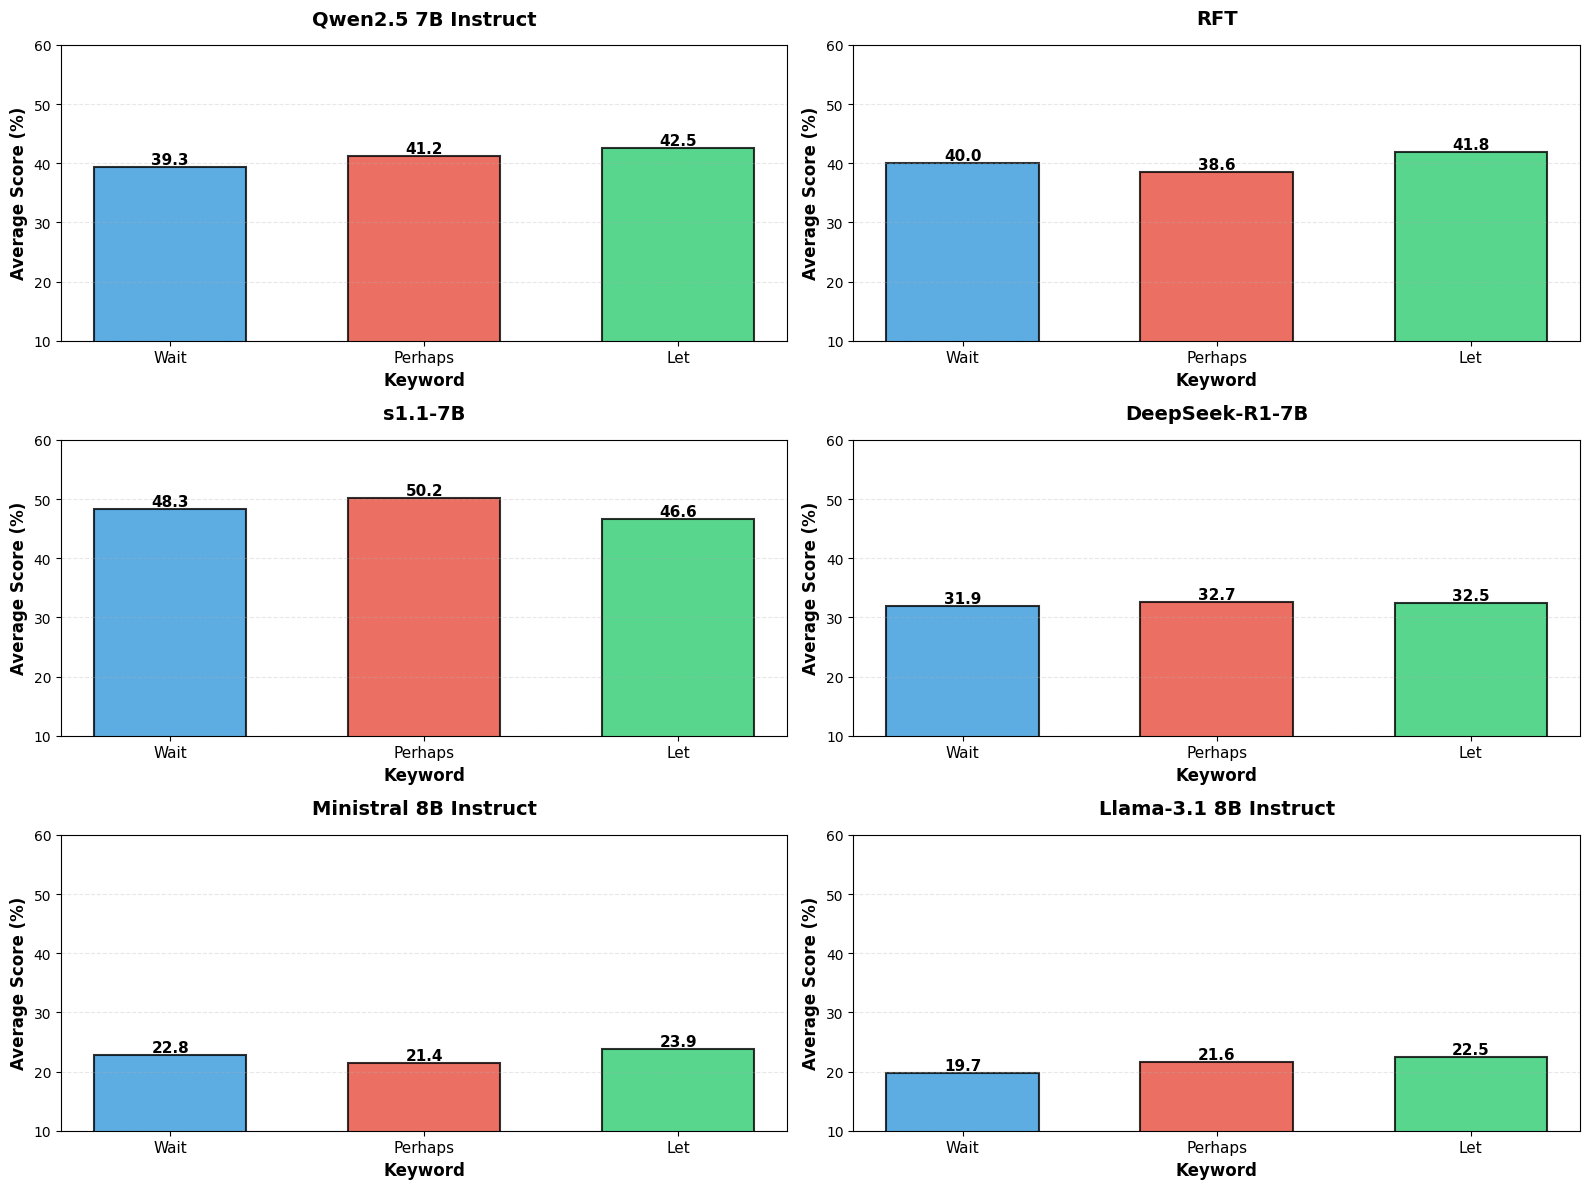

In [32]:
from plot_utils import plot_keyword_comparison_by_model

plot_keyword_comparison_by_model(
    results_df,
    keywords=["Wait", "Perhaps", "Let"],
    output_path="outputs/fig_keyword_comparison.png"
)


In [31]:
float_cols = results_df.select_dtypes(include=[np.number]).columns
results_formatted = results_df.copy()
for col in float_cols:
    results_formatted[col] = results_formatted[col].map('{:.2f}'.format)

print(results_formatted.to_markdown(index=False))

| Model                                   | Keyword   |   Budget |   AIME 2025 |   MATH500 |   MMLU Pro-1K |   SuperGPQA-1K |   Average |
|:----------------------------------------|:----------|---------:|------------:|----------:|--------------:|---------------:|----------:|
| Qwen2.5 7B Instruct                     | Wait      |     8192 |       20    |      61   |          48.7 |           27.4 |     39.27 |
| Qwen2.5 7B Instruct                     | Perhaps   |     8192 |       23.33 |      64   |          49.9 |           27.4 |     41.16 |
| Qwen2.5 7B Instruct                     | Let       |     8192 |       26.67 |      66.4 |          49.5 |           27.6 |     42.54 |
| RFT                                     | Wait      |     8192 |       23.33 |      63.8 |          45.2 |           27.8 |     40.03 |
| RFT                                     | Perhaps   |     8192 |       16.67 |      66   |          44.5 |           27.1 |     38.57 |
| RFT                             